In [1]:
from TestProblems import *
from Solvers import *
from PlotFunctions import *
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# ESDIRK23

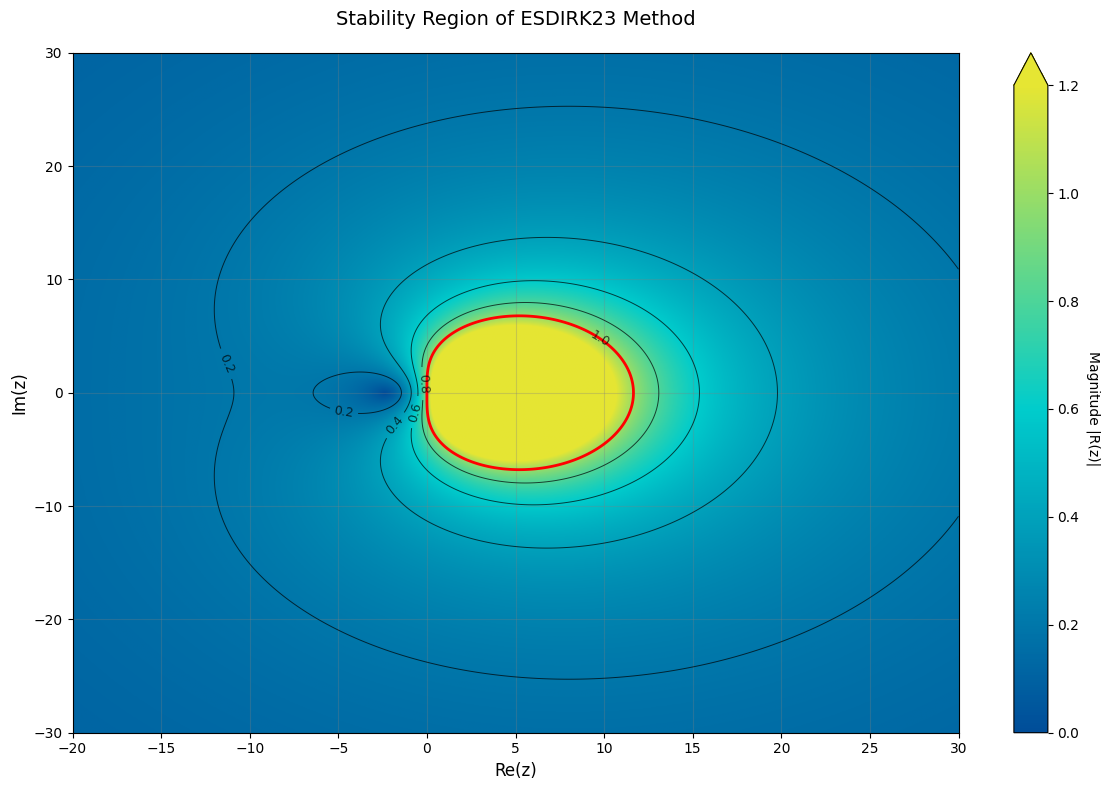

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def esdirk23_stability_function(z):
    """Stability function for ESDIRK23 method"""
    gamma = 1 - np.sqrt(2)/2
    denom = (1 - gamma*z)**2
    return (1 + z*(1 - 2*gamma) + (1/2 - 2*gamma + gamma**2)*z**2) / denom

def plot_stability_region():
    # Create grid
    x = np.linspace(-20, 30, 1000)
    y = np.linspace(-30, 30, 1000)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    
    # Compute stability function
    R = np.abs(esdirk23_stability_function(Z))
    
    # Create viridis-like colormap with enhanced contrast
    colors = [(0, 0.3, 0.6), (0, 0.8, 0.8), (0.9, 0.9, 0.2)]  # Blue -> Cyan -> Yellow
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Plot magnitude with enhanced contrast
    im = plt.imshow(R, extent=[-20, 30, -30, 30], 
                   cmap=cmap, vmin=0, vmax=1.2,
                   origin='lower', aspect='auto')
    
    # Add contour lines
    levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    cs = plt.contour(X, Y, R, levels=levels, 
                    colors='black', linewidths=0.7, alpha=0.7)
    plt.clabel(cs, inline=True, fontsize=9, fmt='%1.1f')
    
    # Highlight the stability boundary
    plt.contour(X, Y, R, levels=[1], colors='red', linewidths=2)
    
    # Formatting
    plt.title('Stability Region of ESDIRK23 Method', fontsize=14, pad=20)
    plt.xlabel('Re(z)', fontsize=12)
    plt.ylabel('Im(z)', fontsize=12)
    plt.grid(True, color='gray', alpha=0.3)
    
    # Colorbar with label
    cbar = plt.colorbar(im, extend='max')
    cbar.set_label('Magnitude |R(z)|', rotation=270, labelpad=15)
    
    # Set axis ticks
    plt.xticks(np.arange(-20, 31, 5))
    plt.yticks(np.arange(-30, 31, 10))
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_stability_region()

## Test on test problems

### Van der Pol

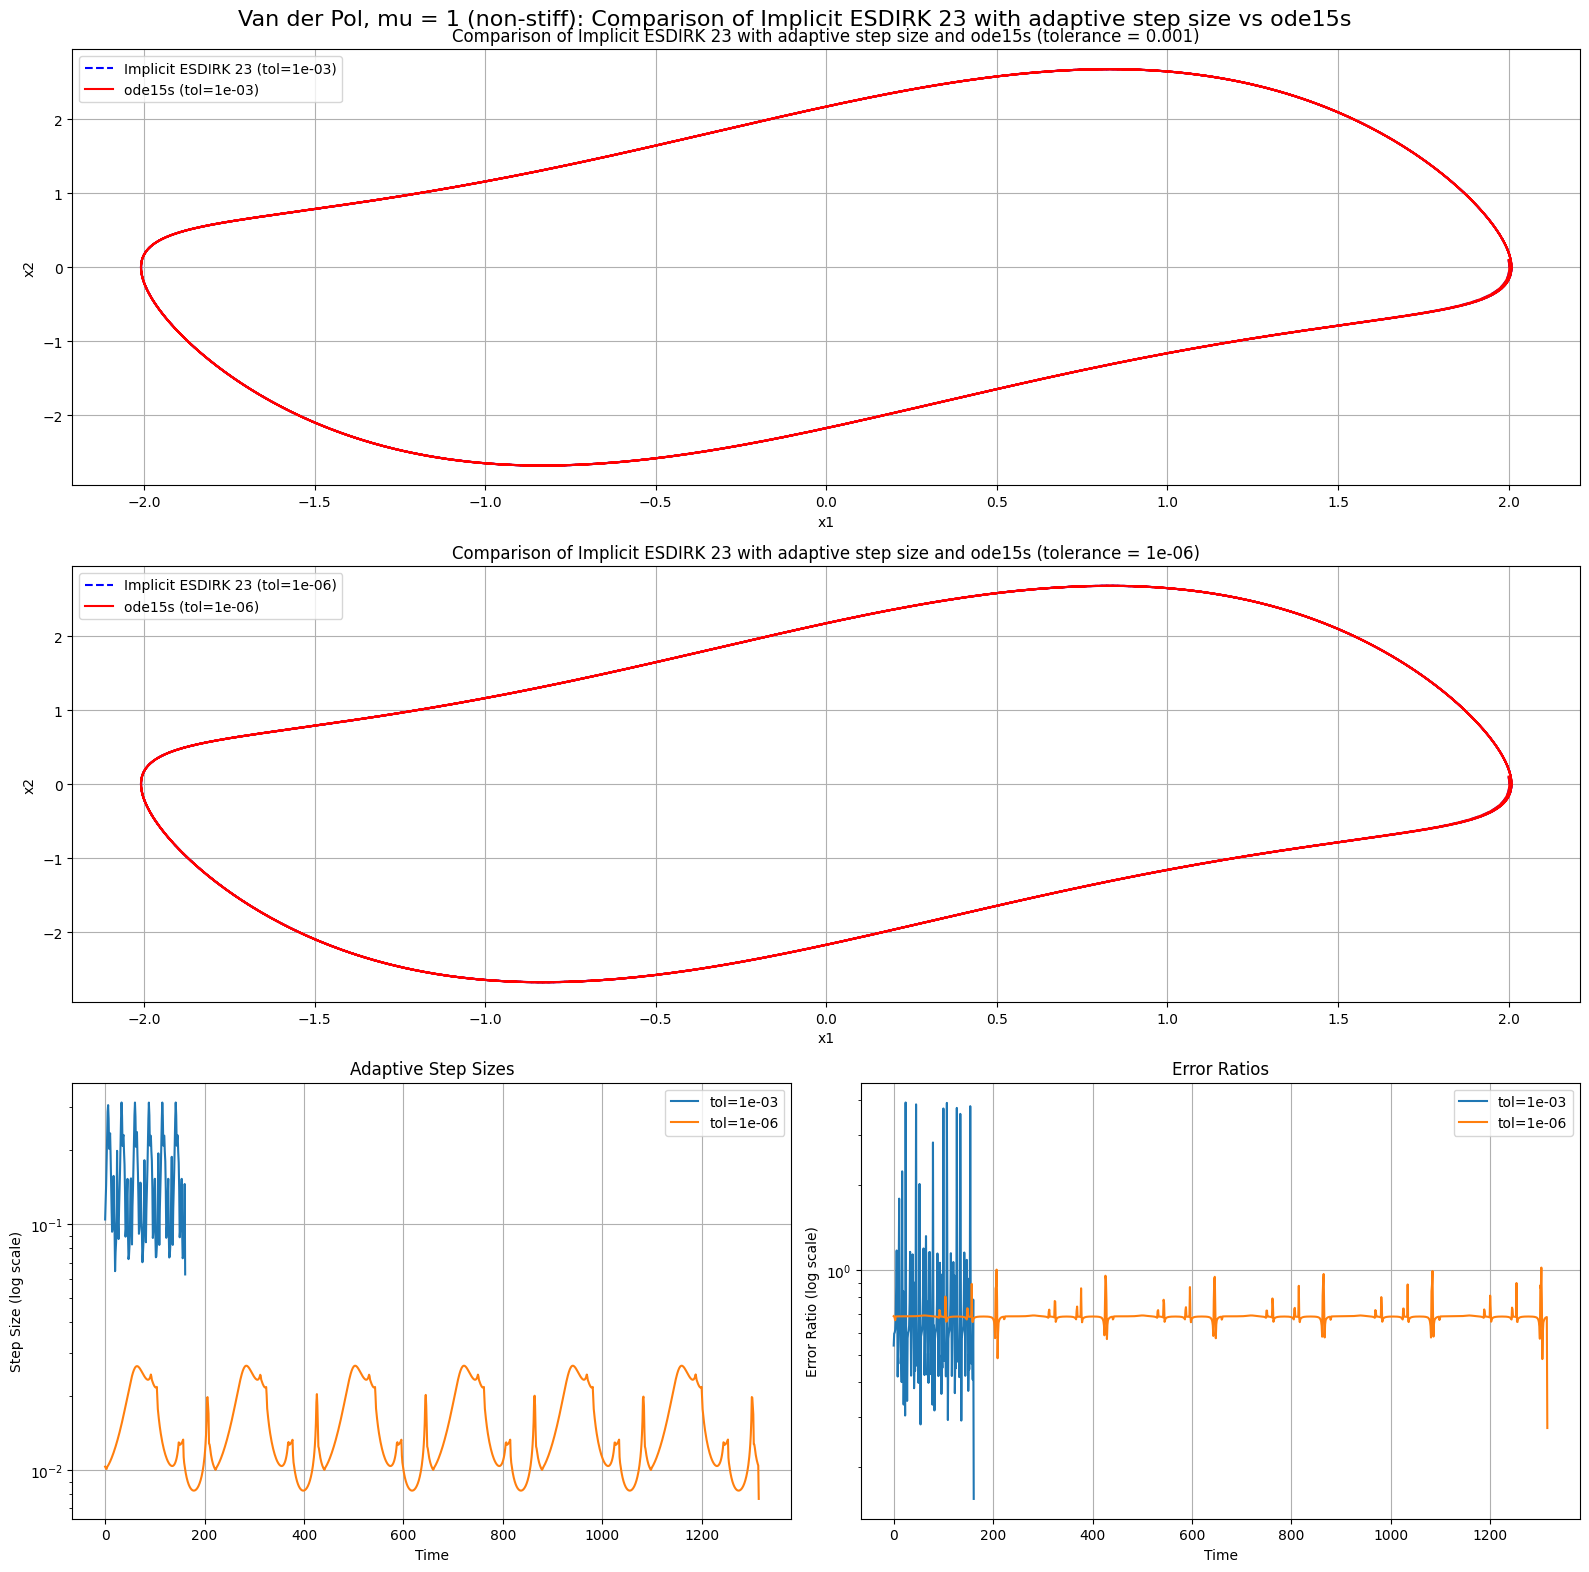

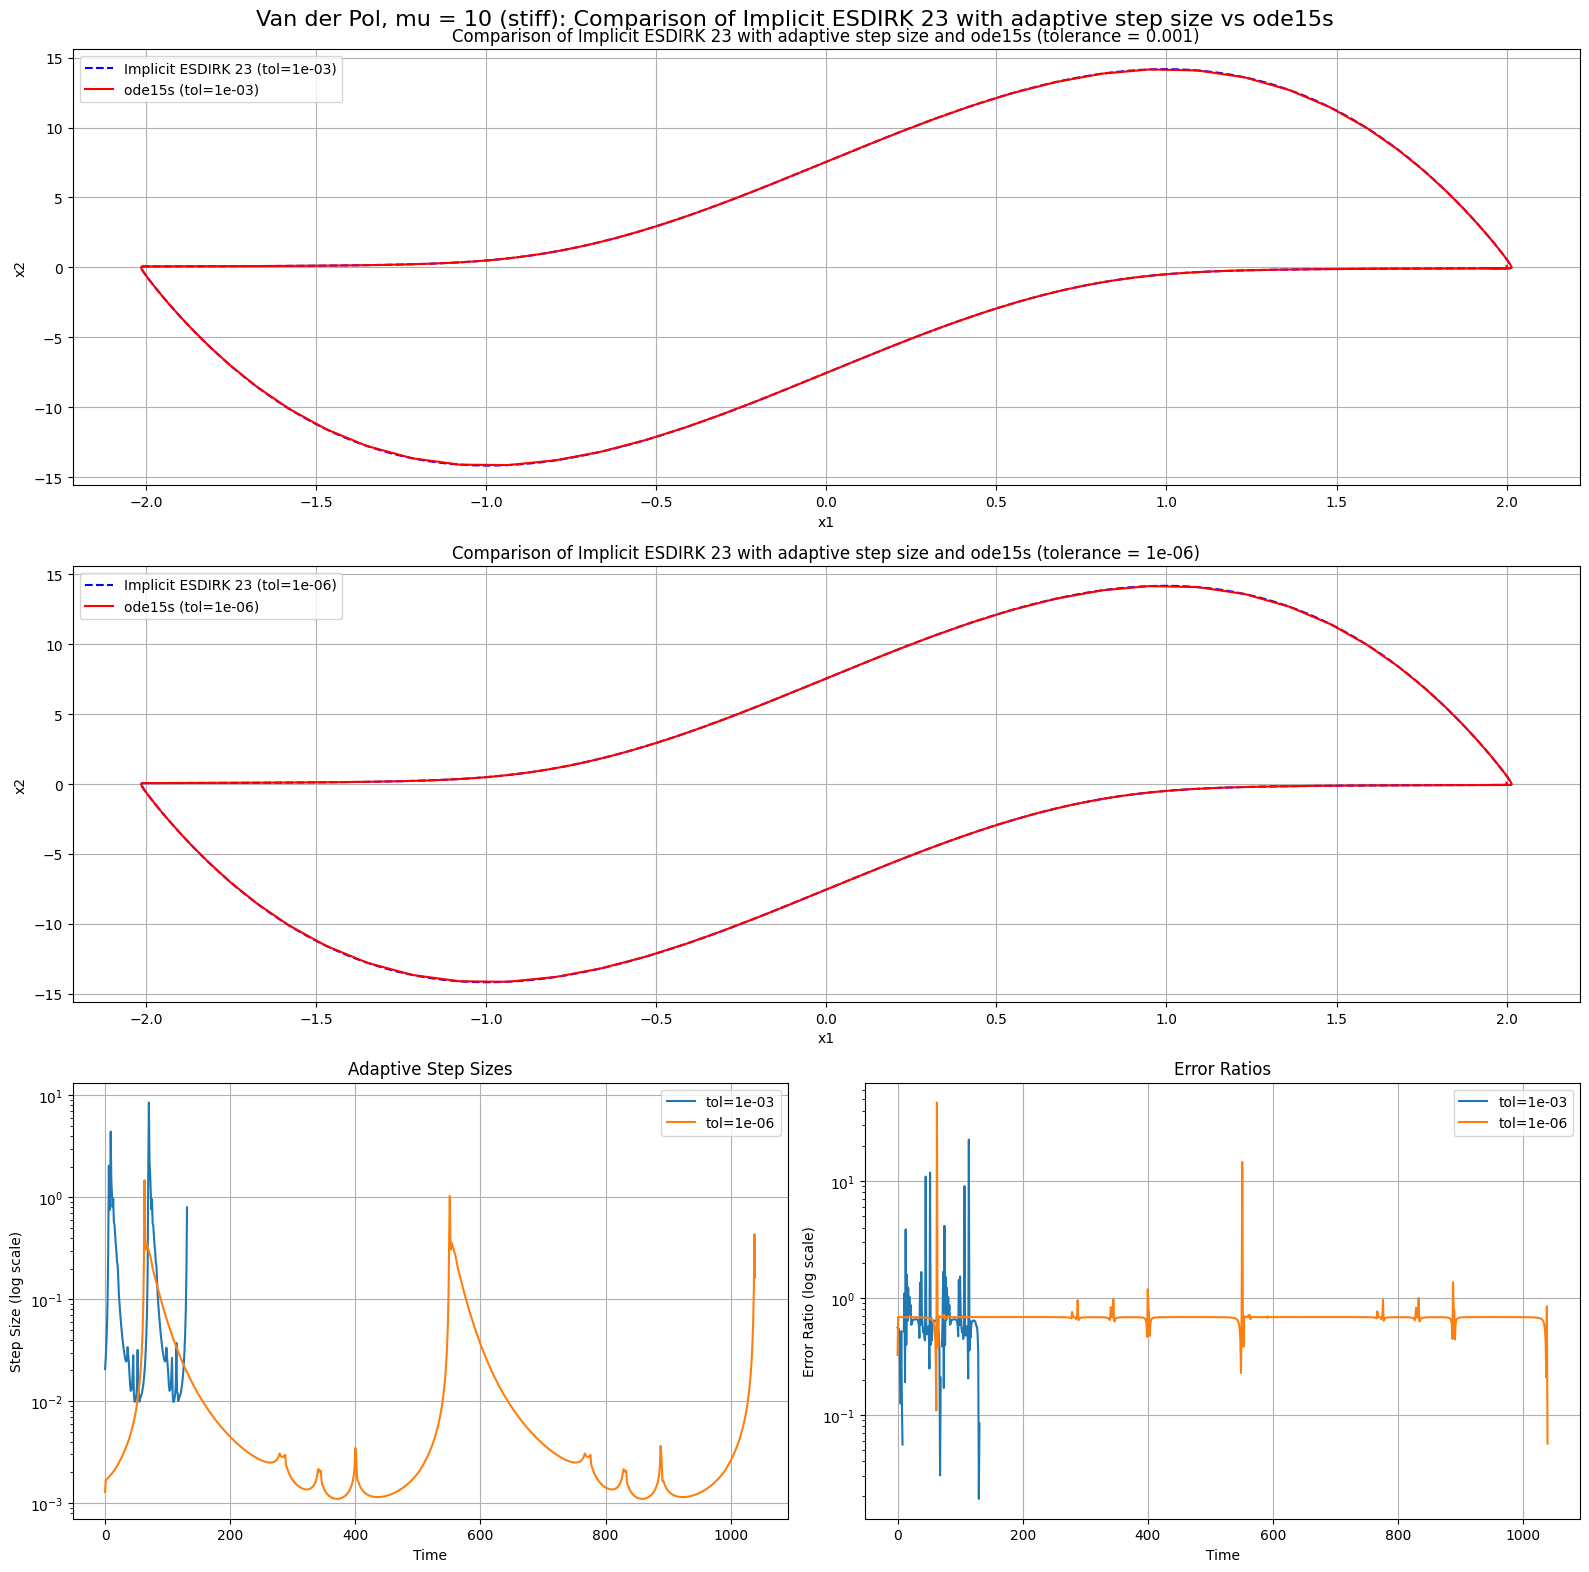

In [3]:
# Define time span and initial conditions
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 10  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0.1])  # Initial condition
vp_ed_adaptive_nonstiff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_nonstiff], model_name = f"Van der Pol, mu = {mu_nonstiff} (non-stiff)", reference_solver_name="ode15s", adaptive_steps = True, steptype = "adaptive", implicit=True, reference_solver='BDF', esdirk = True, h0 = 0.01)
vp_ed_adaptive_stiff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_stiff], model_name = f"Van der Pol, mu = {mu_stiff} (stiff)", reference_solver_name="ode15s", adaptive_steps = True, steptype = "adaptive", implicit=True, reference_solver='BDF', esdirk = True, h0 = 0.01)

### CSTR 1 state

In [ ]:
t_span = (0,120)
cstr_ed_adptive = compare_solvers_cstr(CSTR_1state_model, t_span, model_name = "CSTR 1 state", reference_solver_name="ode15s", adaptive_steps = True, steptype = "adaptive", implicit=True, reference_solver='BDF', esdirk = True, h0 = 0.01, tolerances = [1e-10, 1e-12])

KeyboardInterrupt: 

### PFR 3 state

In [ ]:
# Initial condition
n = 5  # number of spatial points

Tin = 50
CA_in = 1.6 
CB_in = 2.4
x0 = np.concatenate([
    np.ones(n) * CA_in,    # CA initial
    np.ones(n) * CB_in,    # CB initial
    Tin*np.ones(n)  # T initial
])
t_span = (0, 200)

pfr_ed_adaptive = compare_solvers_pfr(PFR_3state_model, t_span, x0, model_name = "PFR 3 state model", reference_solver_name="ode15s",  adaptive_steps = True, implicit = True, esdirk = True, n = n, tolerances = [1e-10, 1e-12], h0 = 0.01, reference_solver='BDF')

## Summary

In [ ]:
print("ESDIRK23 with addaptive steps:")
print("")
print("Van der Pol model (non-stiff, mu = 1), tolerance = 0.001")
print("Accepted steps: ", vp_ed_adaptive_nonstiff[0.001]['n_accept'])
print("Rejected steps: ", vp_ed_adaptive_nonstiff[0.001]['n_reject'])
print("Total number of steps: ", vp_ed_adaptive_nonstiff[0.001]['n_accept'] + vp_ed_adaptive_nonstiff[0.001]['n_reject'])
print("Total number of steps for ode45: ", vp_ed_adaptive_nonstiff[0.001]['ref_nfun'])
print("")
print("Van der Pol model (non-stiff, mu = 10), tolerance = 1e-6")
print("Accepted steps: ", vp_ed_adaptive_stiff[1e-6]['n_accept'])
print("Rejected steps: ", vp_ed_adaptive_stiff[1e-6]['n_reject'])
print("Total number of steps: ", vp_ed_adaptive_stiff[1e-6]['n_accept'] + vp_ed_adaptive_stiff[1e-6]['n_reject'])
print("Total number of steps for ode15s: ", vp_ed_adaptive_stiff[1e-6]['ref_nfun'])
print("")
print("Van der Pol model (stiff, mu = 10), tolerance = 0.001")
print("Accepted steps: ", vp_ed_adaptive_stiff[0.001]['n_accept'])
print("Rejected steps: ", vp_ed_adaptive_stiff[0.001]['n_reject'])
print("Total number of steps: ", vp_ed_adaptive_stiff[0.001]['n_accept'] + vp_ed_adaptive_stiff[0.001]['n_reject'])
print("Total number of steps for ode15s: ", vp_ed_adaptive_stiff[0.001]['ref_nfun'])
print("")
print("Van der Pol model (stiff, mu = 10), tolerance = 1e-6")
print("Accepted steps: ", vp_ed_adaptive_stiff[1e-6]['n_accept'])
print("Rejected steps: ", vp_ed_adaptive_stiff[1e-6]['n_reject'])
print("Total number of steps: ", vp_ed_adaptive_stiff[1e-6]['n_accept'] + vp_ed_adaptive_stiff[1e-6]['n_reject'])
print("Total number of steps for ode15s: ", vp_ed_adaptive_stiff[1e-6]['ref_nfun'])
print("")
print("CSTR model (1 state), tolerance = 1e-10")
print("Accepted steps: ", cstr_ed_adptive[1e-10]['n_accept'])
print("Rejected steps: ", cstr_ed_adptive[1e-10]['n_reject'])   
print("Total number of steps: ", cstr_ed_adptive[1e-10]['n_accept'] + cstr_ed_adptive[1e-10]['n_reject'])
print("Total number of steps for ode15s: ", cstr_ed_adptive[1e-10]['ref_nfun'])
print("")
print("CSTR model (1 state), tolerance = 1e-12")
print("Accepted steps: ", cstr_ed_adptive[1e-12]['n_accept'])
print("Rejected steps: ", cstr_ed_adptive[1e-12]['n_reject'])
print("Total number of steps: ", cstr_ed_adptive[1e-12]['n_accept'] + cstr_ed_adptive[1e-12]['n_reject'])
print("Total number of steps for ode15s: ", cstr_ed_adptive[1e-12]['ref_nfun'])
print("")
print("PFR model (3 state), tolerance = 1e-10")
print("Accepted steps: ", pfr_ed_adaptive[1e-10]['n_accept'])
print("Rejected steps: ", pfr_ed_adaptive[1e-10]['n_reject'])
print("Total number of steps: ", pfr_ed_adaptive[1e-10]['n_accept'] + pfr_ed_adaptive[1e-10]['n_reject'])
print("Total number of steps for ode45: ", pfr_ed_adaptive[1e-10]['ref_nfun'])
print("")
print("PFR model (3 state), tolerance = 1e-12")
print("Accepted steps: ", pfr_ed_adaptive[1e-12]['n_accept'])
print("Rejected steps: ", pfr_ed_adaptive[1e-12]['n_reject'])
print("Total number of steps: ", pfr_ed_adaptive[1e-12]['n_accept'] + pfr_ed_adaptive[1e-12]['n_reject'])
print("Total number of steps for ode45: ", pfr_ed_adaptive[1e-12]['ref_nfun'])
print("")